<a href="https://colab.research.google.com/github/natalia-kurbakova/Baruch-Data-Challenge/blob/main/decison-tree--update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# utilizing Example from DataCamp

In [27]:
''' import packages '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
import seaborn as sns
import datetime 
from sklearn.metrics import confusion_matrix

''' load data '''

train = pd.read_csv("train updated 04132022.csv")

''' set option to display full dataframe '''

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
''' create dataframe and drop rows with missing values - explanation attached in folder '''

train = pd.DataFrame(train)
train = train.dropna()

In [4]:
''' changing the datetime format in Date Deployed '''

train['Date Deployed'] = pd.to_datetime(train['Date Deployed']).dt.strftime('%Y%m%d')


''' creating new dataframe with reordered columns '''

new_df = train.reindex(columns=['deviceid', 'avg_volt_change_charging', 'avg_volt_change_discharging', 'max_voltage_day', 
                                'fail_7', 'charge_cycle_time_below_12', 'Date Deployed', 
                                'avg_time_charging_lag14', 'avg_time_charging_lag13', 'avg_time_charging_lag12', 'avg_time_charging_lag11', 'avg_time_charging_lag10', 'avg_time_charging_lag9', 'avg_time_charging_lag8', 'avg_time_charging_lag7', 'avg_time_charging_lag6', 'avg_time_charging_lag5', 'avg_time_charging_lag4', 'avg_time_charging_lag3', 'avg_time_charging_lag2', 'avg_time_charging_lag1', 
                                'avg_time_discharging_lag14', 'avg_time_discharging_lag13', 'avg_time_discharging_lag12', 'avg_time_discharging_lag11', 'avg_time_discharging_lag10', 'avg_time_discharging_lag9', 'avg_time_discharging_lag8', 'avg_time_discharging_lag7', 'avg_time_discharging_lag6', 'avg_time_discharging_lag5', 'avg_time_discharging_lag4', 'avg_time_discharging_lag3', 'avg_time_discharging_lag2', 'avg_time_discharging_lag1', 
                                'charging_rate_lag7', 'charging_rate_lag6', 'charging_rate_lag5', 'charging_rate_lag4', 'charging_rate_lag3', 
                                'discharging_rate_lag8', 'discharging_rate_lag7', 'discharging_rate_lag6', 'discharging_rate_lag5', 'discharging_rate_lag4', 'discharging_rate_lag3',
                                'avg_time_charging', 'avg_time_discharging', 'cycle_time', 'chargecycles', 'dischargecycles', 'piececount', 'total_off_time', 'number_times_restart'])

In [5]:
''' changing datatype of Date Deployed column so it can be considered when building the prediction '''

new_df['Date Deployed'] = new_df['Date Deployed'].astype(int)


''' setting device ID as new dataframe index '''

new_df.set_index("deviceid", inplace=True)

In [46]:
# Split the data into two DataFrames: X (features) and y (target variable)
y = new_df["fail_7"]  # Specify one column as the target variable
X = new_df.drop('fail_7', axis = 1)  # Specify at least two columns as features


# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23682, 52), (10150, 52), (23682,), (10150,))

In [47]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list((range(4, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a decision tree classifer object
clf = DecisionTreeClassifier(random_state=123)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=20,  # Number of parameter candidate settings to sample
    verbose=3,  # The higher this is, the more messages are outputed
    random_state=123,
)

# Train the model on the training set
clf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", clf_rs.best_params_)
print("Best accuracy found: ", clf_rs.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4;, score=0.808 total time=   0.7s
[CV 2/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4;, score=0.801 total time=   0.6s
[CV 3/3] END ccp_alpha=0.001, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4;, score=0.810 total time=   0.6s
[CV 1/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4;, score=0.787 total time=   0.4s
[CV 2/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4;, score=0.784 total time=   0.4s
[CV 3/3] END ccp_alpha=0.01, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4;, score=0.788 total time=   0.4s
[CV 1/3] END ccp_alpha=0, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.802 total time=   0.6s
[CV 2/3] END ccp_alpha

In [48]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "entropy",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 3,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.001,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

[Text(0.4375, 0.9285714285714286, 'charge_cycle_time_below_12 <= 0.5\nentropy = 0.801\nsamples = 23682\nvalue = [17906, 5776]'),
 Text(0.25, 0.7857142857142857, 'discharging_rate_lag3 <= 0.342\nentropy = 0.445\nsamples = 9677\nvalue = [8780, 897]'),
 Text(0.20652173913043478, 0.6428571428571429, 'entropy = 0.384\nsamples = 6681\nvalue = [6181, 500]'),
 Text(0.29347826086956524, 0.6428571428571429, 'entropy = 0.564\nsamples = 2996\nvalue = [2599, 397]'),
 Text(0.625, 0.7857142857142857, 'discharging_rate_lag3 <= 0.152\nentropy = 0.933\nsamples = 14005\nvalue = [9126, 4879]'),
 Text(0.3804347826086957, 0.6428571428571429, 'discharging_rate_lag3 <= -0.138\nentropy = 0.89\nsamples = 12282\nvalue = [8512, 3770]'),
 Text(0.17391304347826086, 0.5, 'charging_rate_lag3 <= -0.203\nentropy = 0.989\nsamples = 2020\nvalue = [884, 1136]'),
 Text(0.08695652173913043, 0.35714285714285715, 'charging_rate_lag3 <= -0.675\nentropy = 0.584\nsamples = 300\nvalue = [258, 42]'),
 Text(0.043478260869565216, 0.

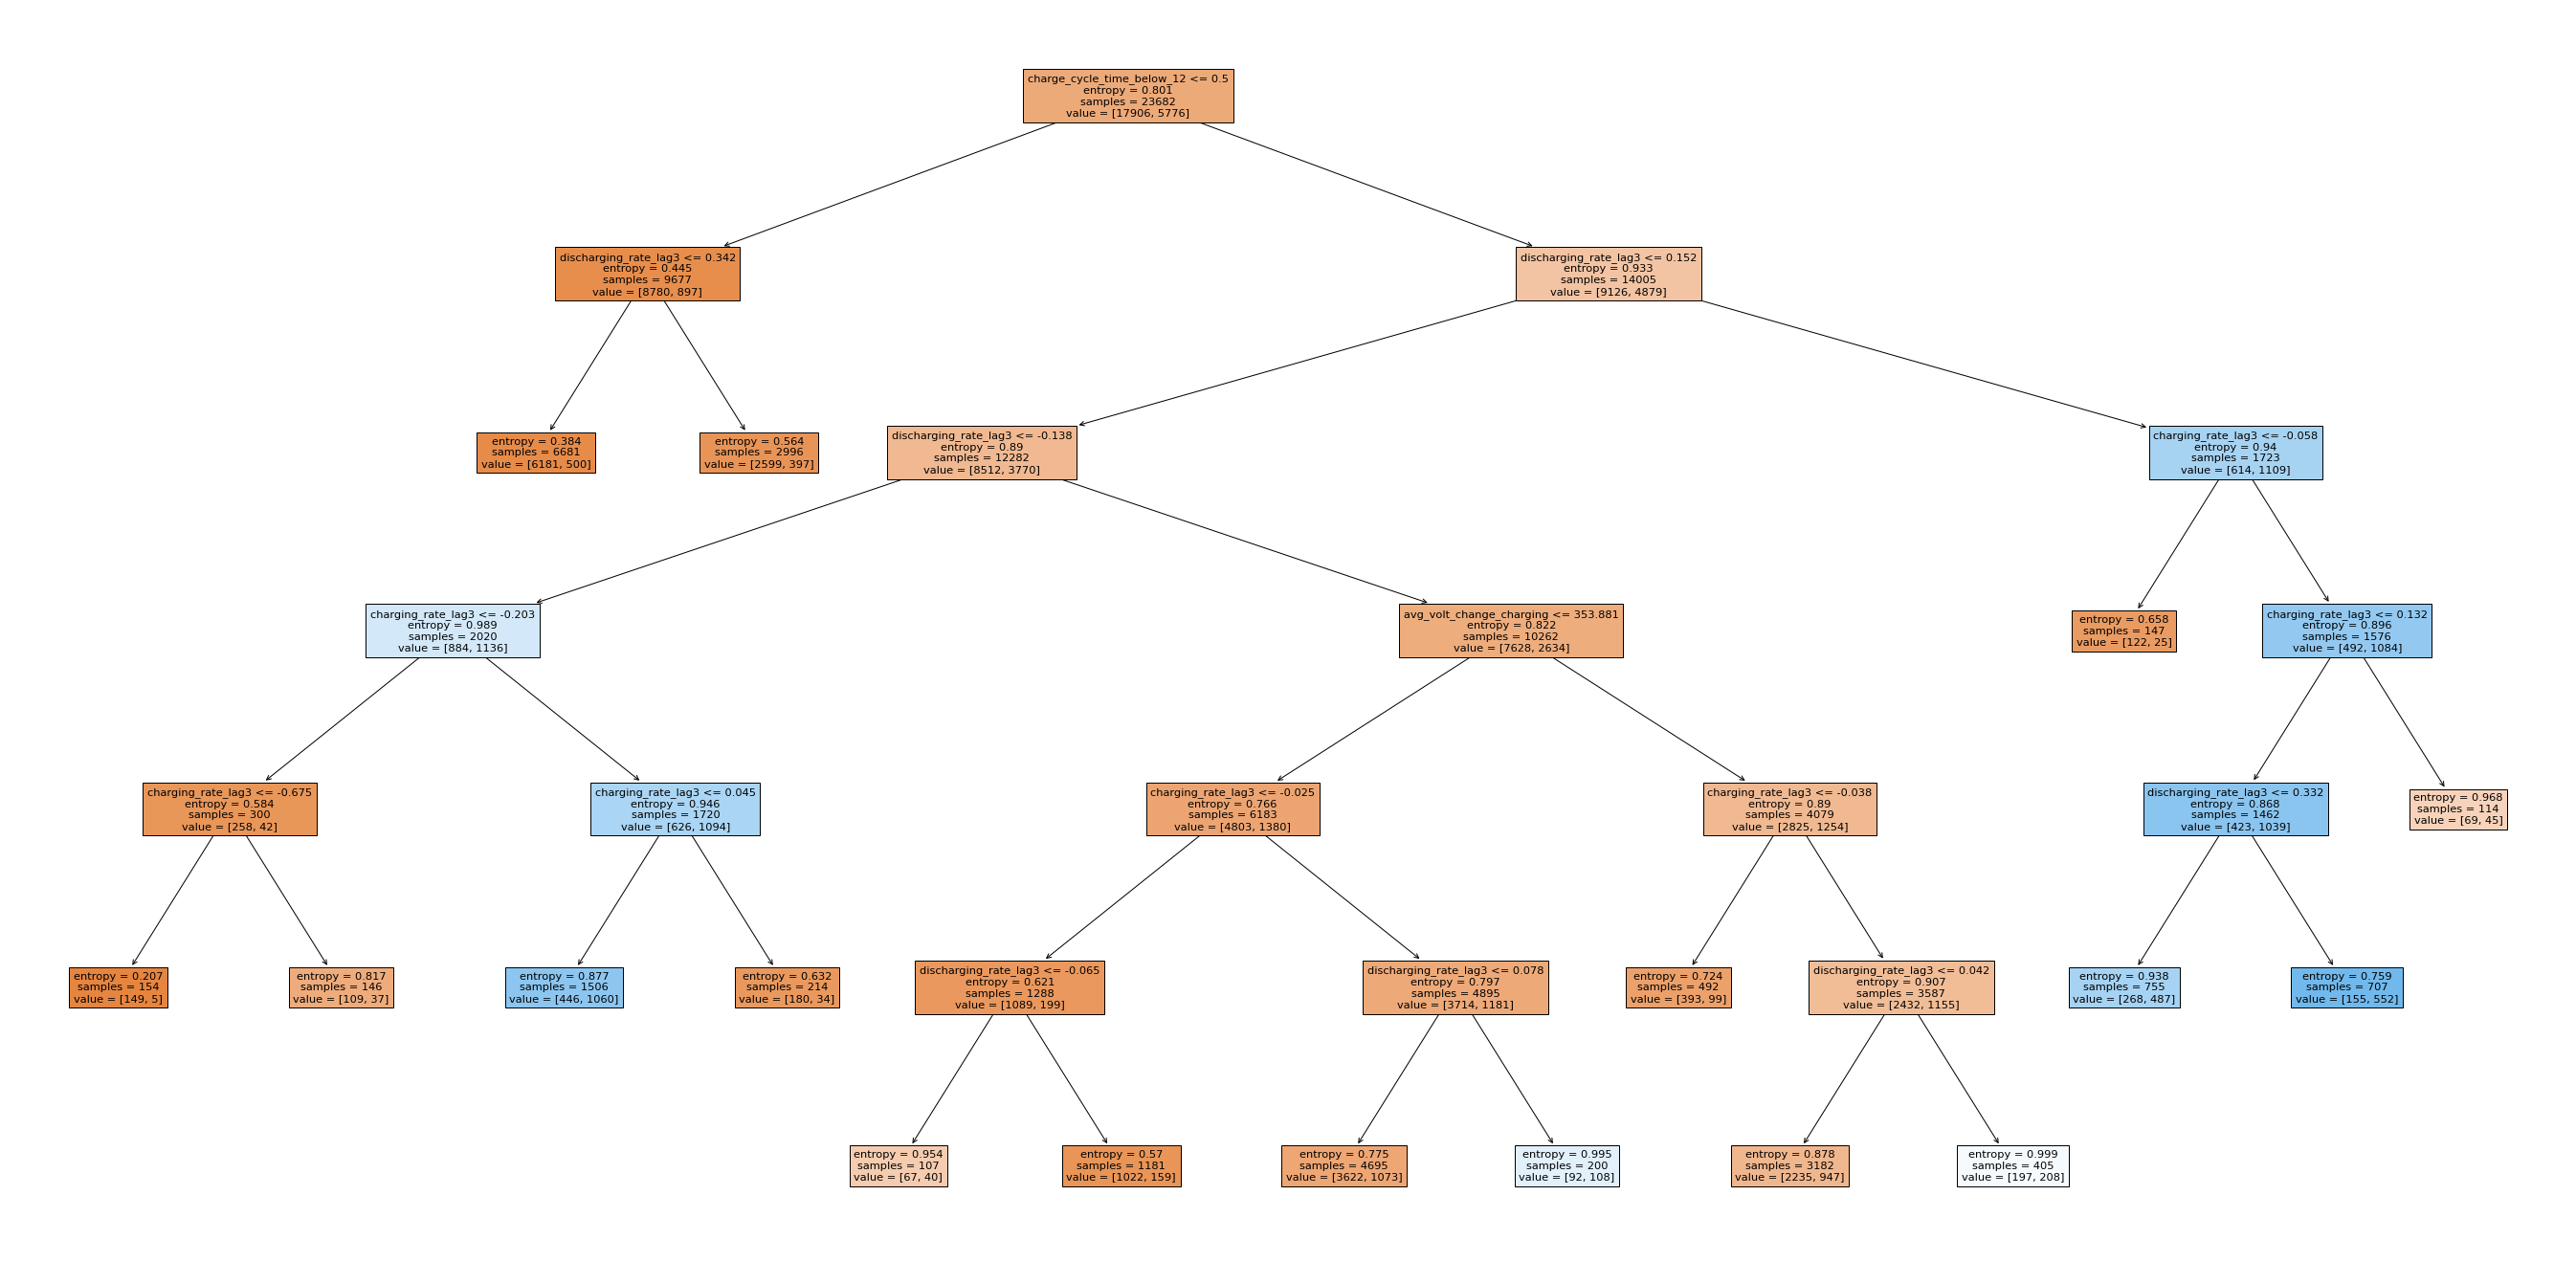

In [56]:
plt.figure(figsize=(48, 24))
tree.plot_tree(clf, feature_names=X.columns, filled = True)

In [57]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8039408866995074


In [58]:


confusion_matrix(y_test, y_pred)



array([[7101,  584],
       [1406, 1059]])